In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import scipy as sc
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquistion

#Collection and processing


In [2]:
heart_data = pd.read_csv("heart_disease_data.csv")

In [3]:
#print first 5 rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#checking missing values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#statistical measures about the data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#checking the distribution of target variables

heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Data Visualisation

Number of people having sex as 1 are 207 and Number of people having sex as 0 are 96


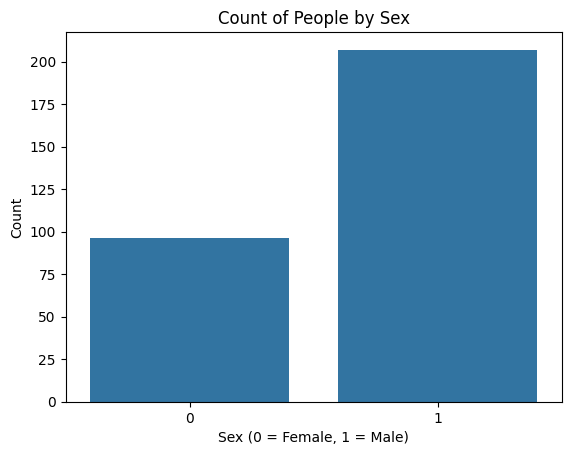

In [10]:
sex_counts = heart_data.sex.value_counts()

# Print the counts for each sex
print(f'Number of people having sex as 1 are {sex_counts[1]} and Number of people having sex as 0 are {sex_counts[0]}')

# Create a count plot for the 'sex' column
p = sns.countplot(data=heart_data, x="sex") 
plt.title('Count of People by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


People having gender as 0 are more than twice the people having gender as 1

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


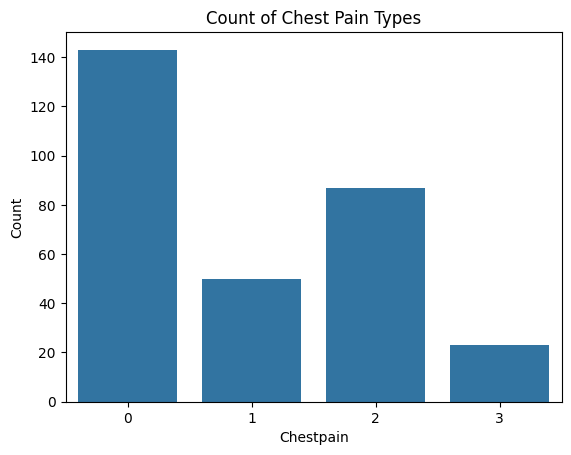

In [11]:
x = heart_data.cp.value_counts()
print(x)


p = sns.countplot(data=heart_data, x="cp")
plt.xlabel('Chestpain')
plt.ylabel('Count')
plt.title('Count of Chest Pain Types')
plt.show()

For chestpain

0: Typical angina

1: Atypical angina

2: Non-anginal pain

3: Asymptomatic

restecg
1    152
0    147
2      4
Name: count, dtype: int64


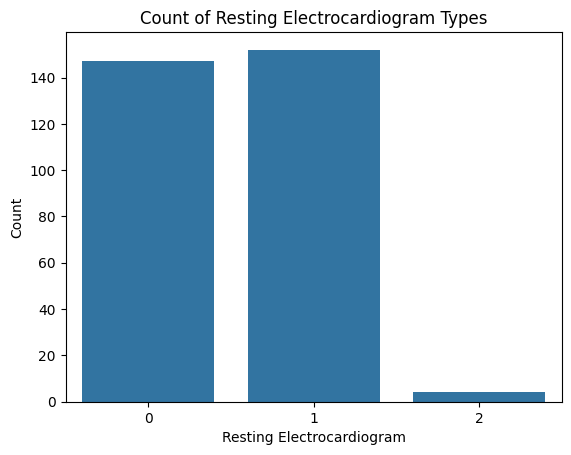

In [12]:
x = heart_data.restecg.value_counts()
print(x)


p = sns.countplot(data=heart_data, x="restecg")
plt.xlabel('Resting Electrocardiogram')
plt.ylabel('Count')
plt.title('Count of Resting Electrocardiogram Types')
plt.show()


Resting Electrocardiogram (RestECG) Values
The restecg variable often has the following values:

0: Normal

1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of more than 0.05 mV)

2: Showing possible left ventricular hypertrophy (LVH) by Estes’ criteria

exang
0    204
1     99
Name: count, dtype: int64


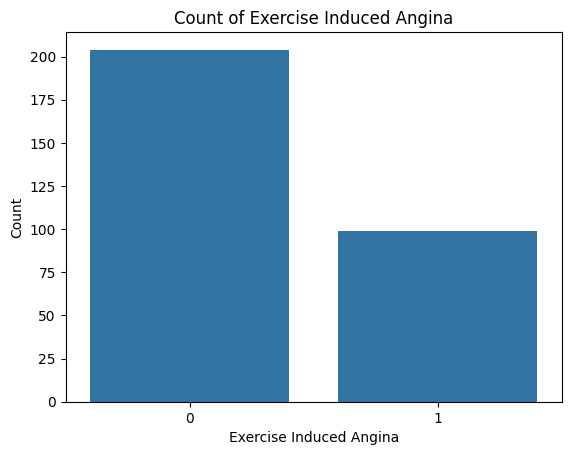

In [13]:
x = heart_data.exang.value_counts()
print(x)

p = sns.countplot(data=heart_data, x="exang")
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.title('Count of Exercise Induced Angina')
plt.show()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64


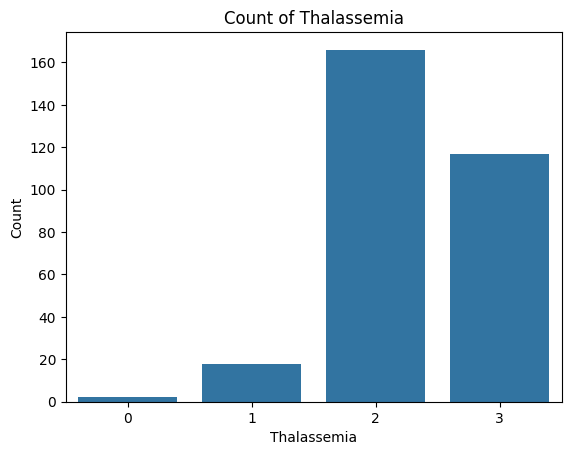

In [14]:
x = heart_data.thal.value_counts()
print(x)

p = sns.countplot(data=heart_data, x="thal")
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.title('Count of Thalassemia')
plt.show()

Thal Values
The thal variable often has the following values:

1: Normal (no thalassemia)

2: Fixed defect (no blood flow to the area of the heart)

3: Reversible defect (reduced blood flow to the area of the heart during stress but normal at rest)

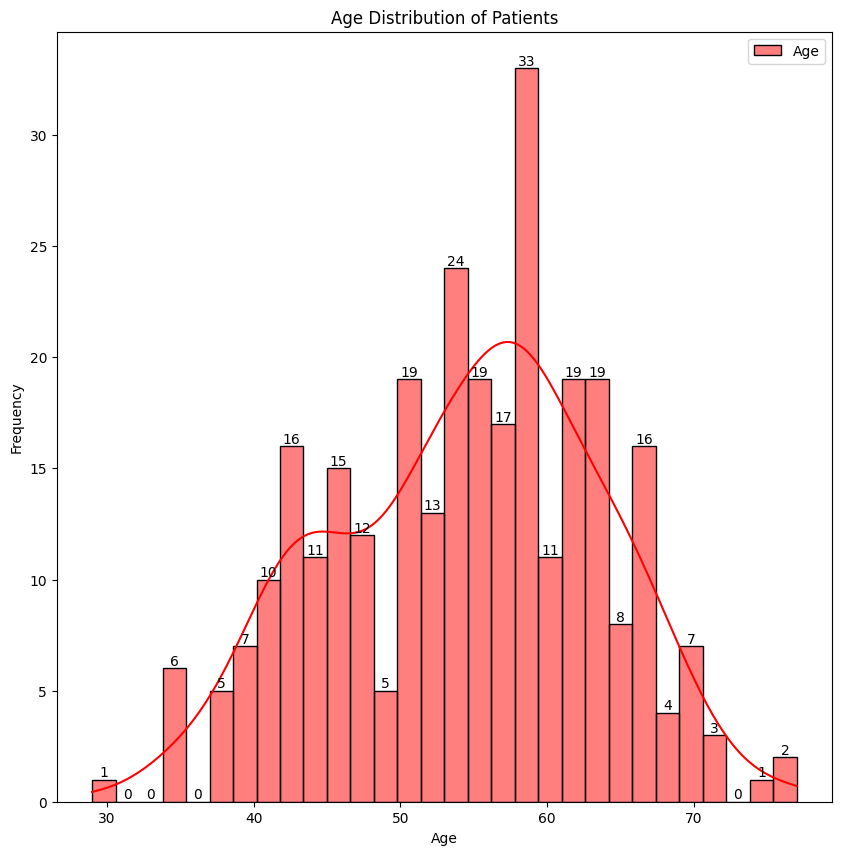

In [15]:
import numpy as np


heart_data['age'].replace([np.inf, -np.inf], np.nan, inplace=True)
plt.figure(figsize=(10, 10))
ax = sns.histplot(heart_data['age'], color="red", kde=True, bins=30, label="Age")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')
plt.legend()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.show()


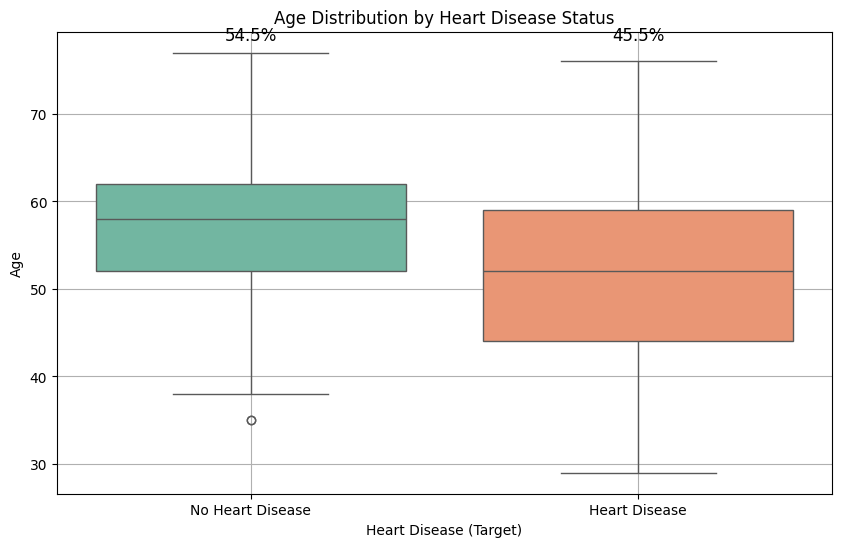

In [16]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=heart_data, x='target', y='age', hue='target', palette='Set2', legend=False)

plt.xlabel('Heart Disease (Target)')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease Status')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])  

target_counts = heart_data['target'].value_counts(normalize=True) * 100
for i, count in enumerate(target_counts):
    plt.text(i, heart_data['age'].max() + 1, f'{count:.1f}%', 
             ha='center', va='bottom', fontsize=12)
plt.grid(True)

plt.show()


# 1 represents defective heart
# 0 represents healthy


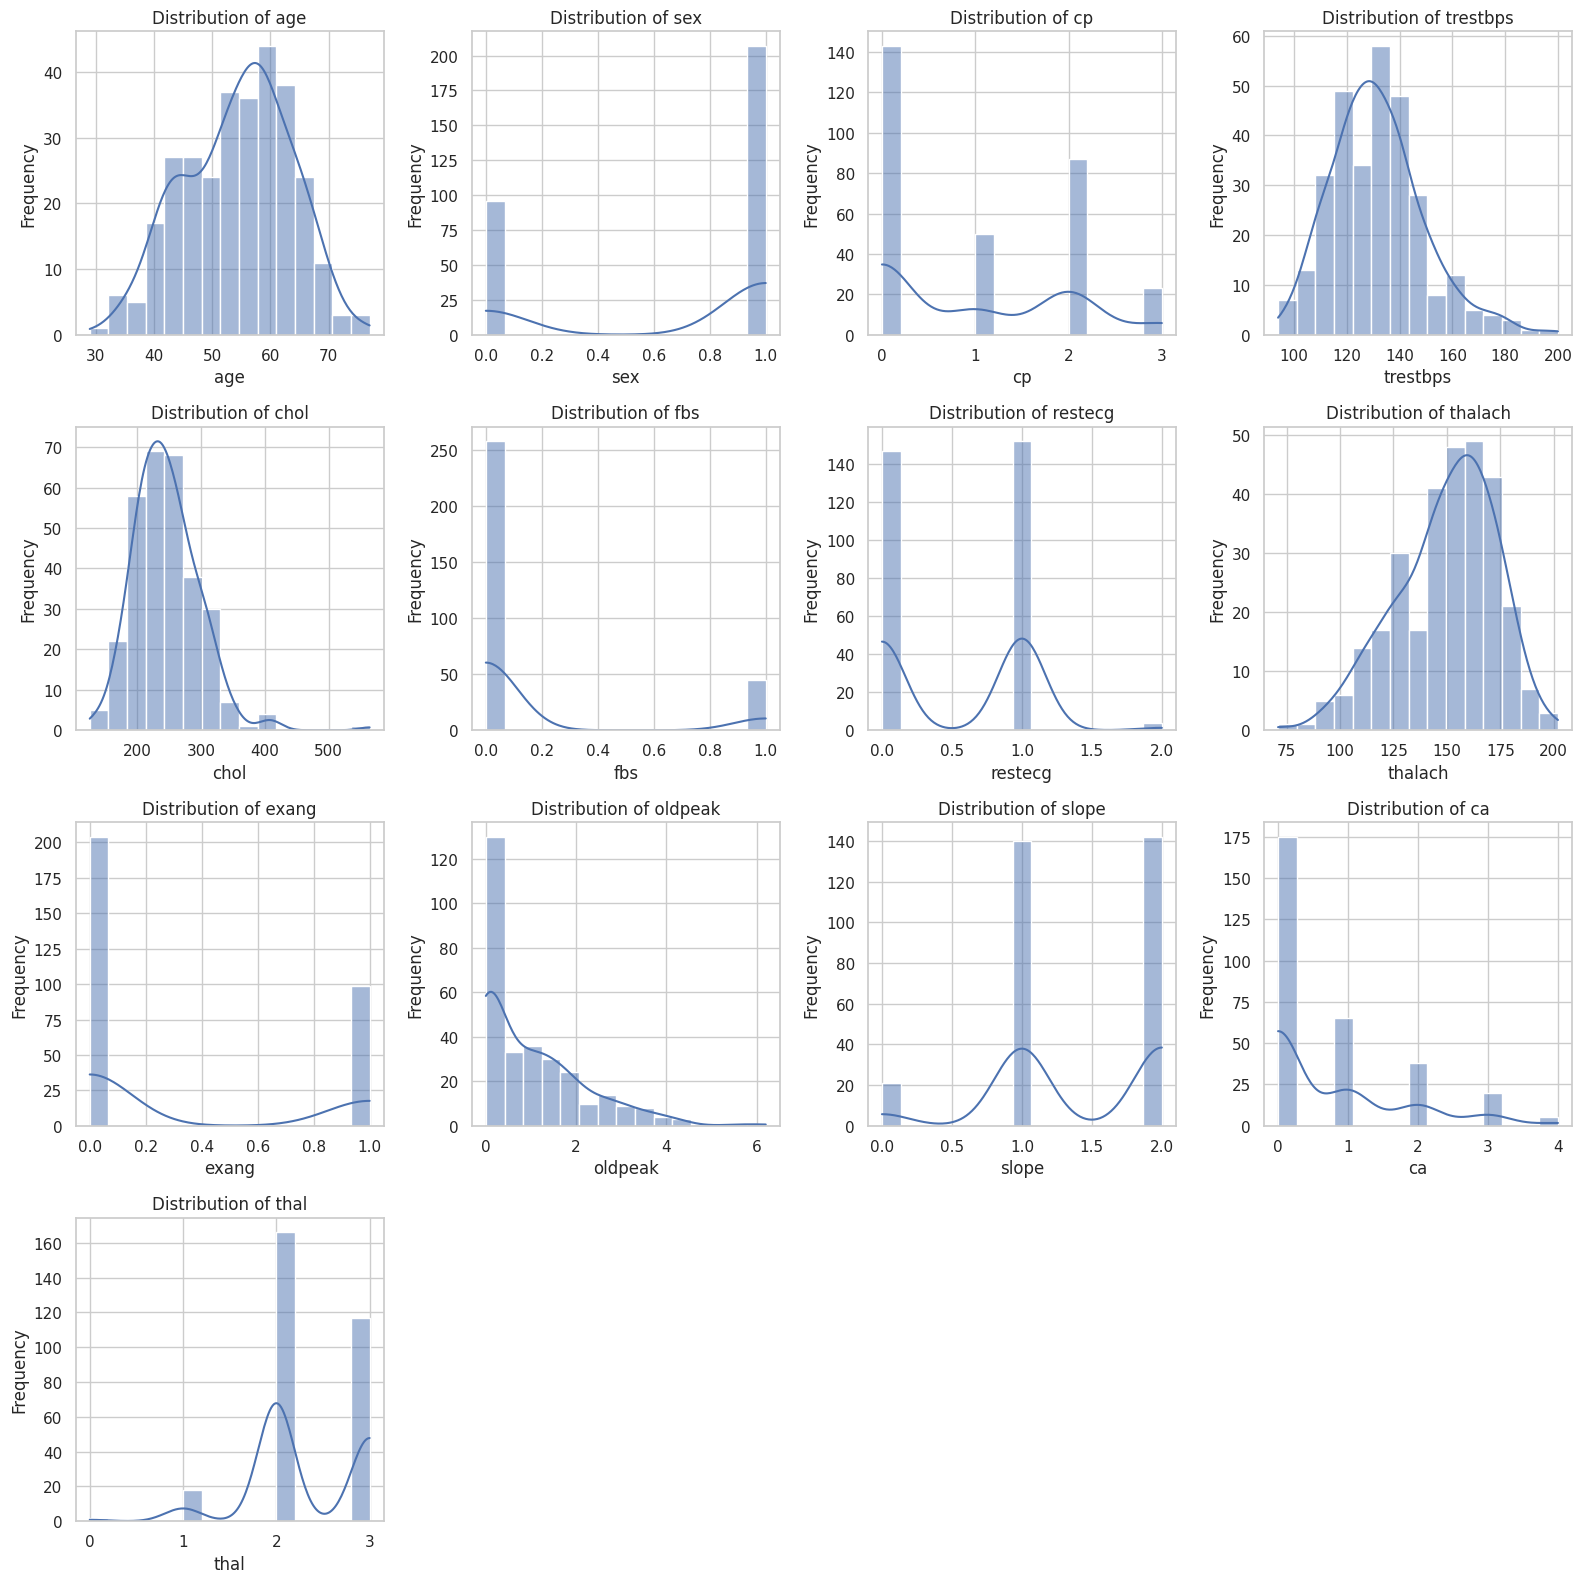

In [17]:

x = heart_data.drop(columns='target',axis=1)
y = heart_data['target']

x.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))  
axes = axes.flatten()  

for i, column in enumerate(x.columns):
    sns.histplot(x[column], bins=15, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(len(x.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()


In [18]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [19]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the data into testing and training data


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y,random_state=2)

#.2 refers to 20% of data for testing

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


# Model training

Logistic Regression

In [22]:
model = LogisticRegression()

Training the LogisticRegression model

In [23]:

model = LogisticRegression(max_iter=1000)  
model.fit(x_train, y_train)



LogisticRegression(max_iter=1000)

# Model evaluation


Accuracy Score

In [24]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [25]:
print("Accuracy on training data : ",training_data_accuracy)

Accuracy on training data :  0.8553719008264463


In [26]:
#accuracy on test data

x_test_prediction = model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [27]:
print("Test data accuracy :",test_data_accuracy)

Test data accuracy : 0.8032786885245902


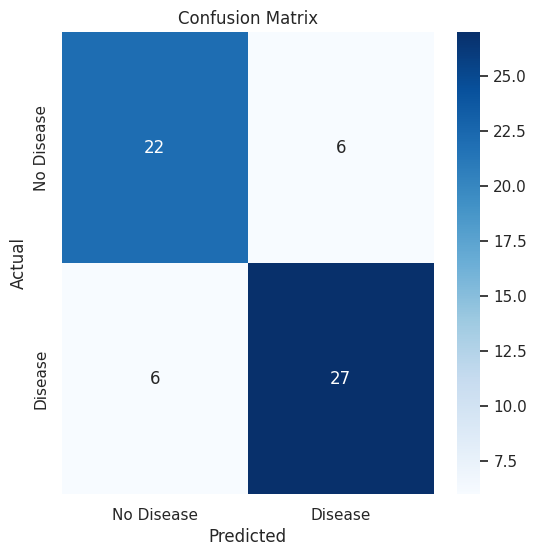

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, model.predict(x_test))

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

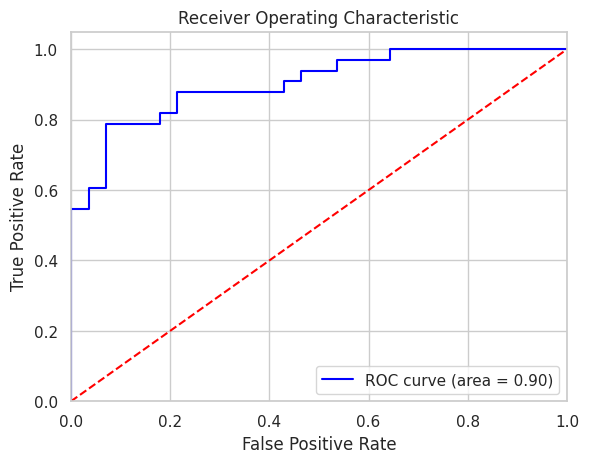

In [29]:
# ROC Curve
y_scores = model.predict_proba(x_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

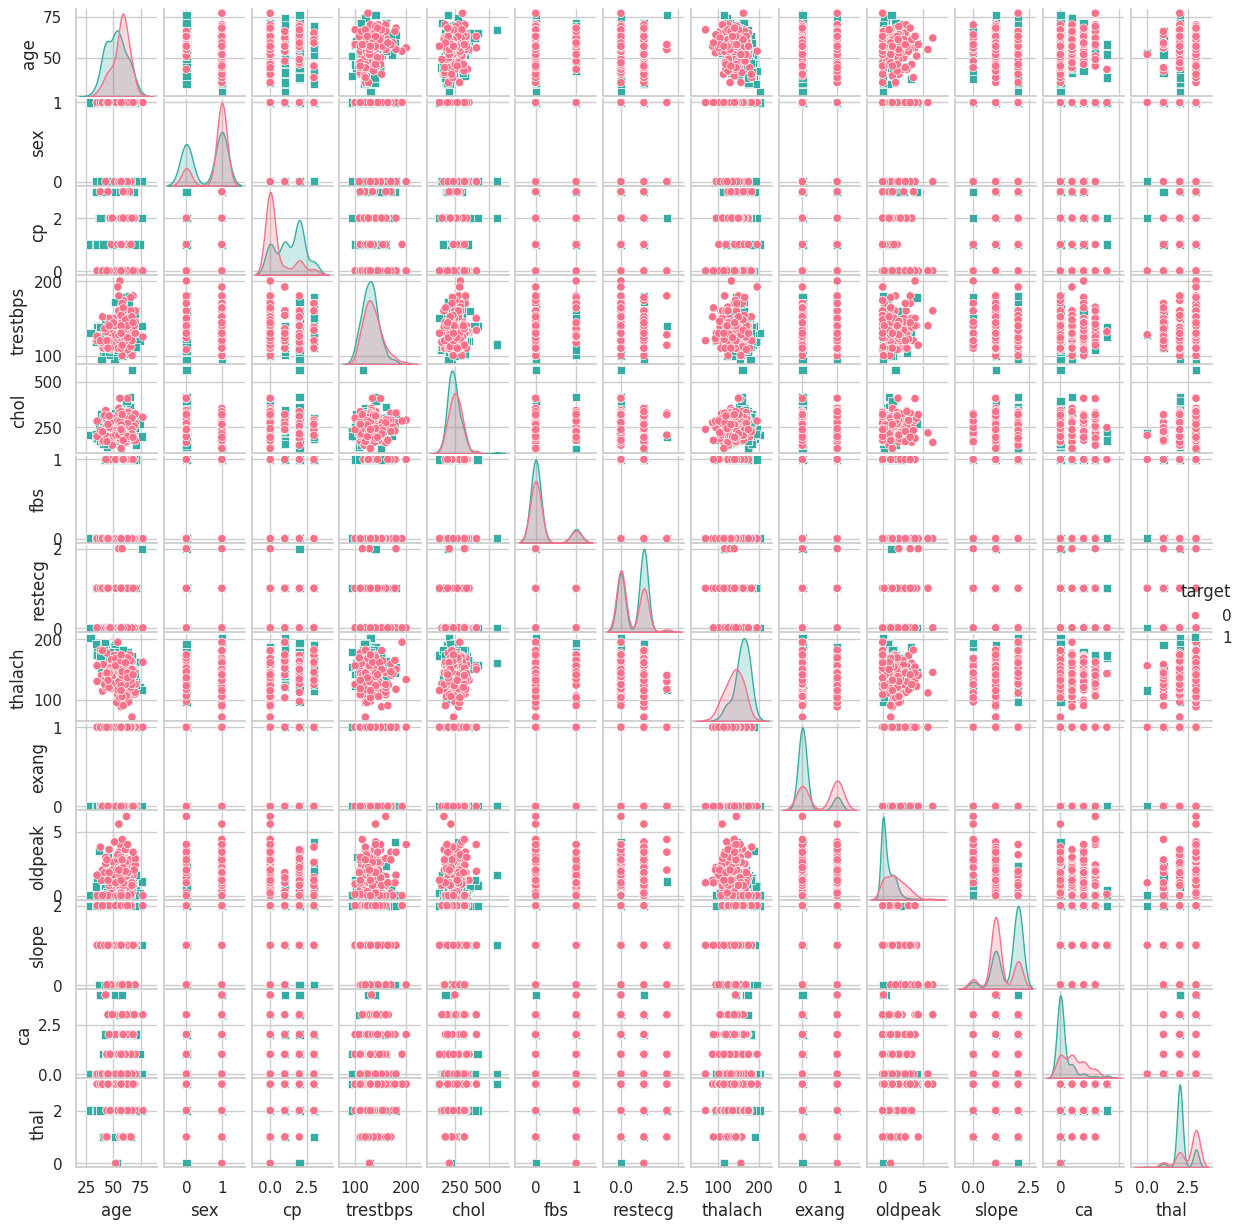

In [30]:
# Pair Plot

heart_data.replace([np.inf, -np.inf], np.nan, inplace=True)


pairplot = sns.pairplot(
    heart_data,
    hue='target',  
    diag_kind='kde',
    markers=["o", "s"],
    palette='husl',
    height=3.5  
)

pairplot.fig.set_size_inches(12, 12) 

plt.savefig("pairplot_heart_disease.png", dpi=300, bbox_inches='tight')

plt.show()

# Building a predictive system

Please enter the following values:


Age:  66
Sex (1 = Male, 0 = Female):  0



Chest Pain Type (cp):
0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic


Chest Pain Type (0-3):  3
Resting Blood Pressure (in mm Hg):  150
Serum Cholesterol (in mg/dl):  226
Fasting Blood Sugar (1 = True, 0 = False):  0



Resting Electrocardiographic Results (RestECG):
0: Normal
1: Having ST-T wave abnormality
2: Showing possible left ventricular hypertrophy (LVH) by Estes’ criteria


RestECG (0-2):  1
Maximum Heart Rate Achieved:  114
Exercise Induced Angina (1 = Yes, 0 = No):  0
Oldpeak (depression induced by exercise relative to rest):  2.6



Slope of the Peak Exercise ST Segment (slope):
0: Upsloping
1: Flat
2: Downsloping


Slope of the Peak Exercise ST Segment (0-2):  0
Number of Major Vessels (0-3):  0



Thalassemia (thal):
1: Normal (no thalassemia)
2: Fixed defect (no blood flow to the area of the heart)
3: Reversible defect (reduced blood flow during stress but normal at rest)


Thalassemia (1-3):  2


Input data: (66, 0, 3, 150, 226, 0, 1, 114, 0, 2.6, 0, 0, 2)
Prediction (0 = No Disease, 1 = Disease): 1
There is a risk of heart disease.


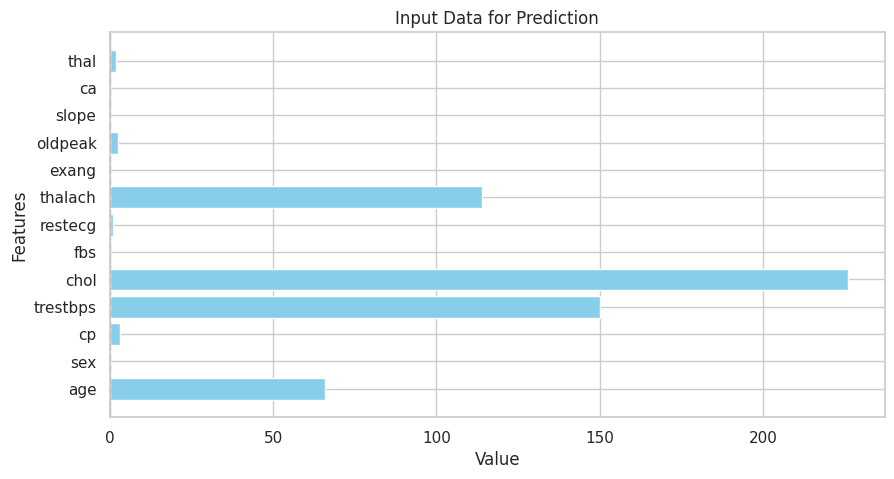

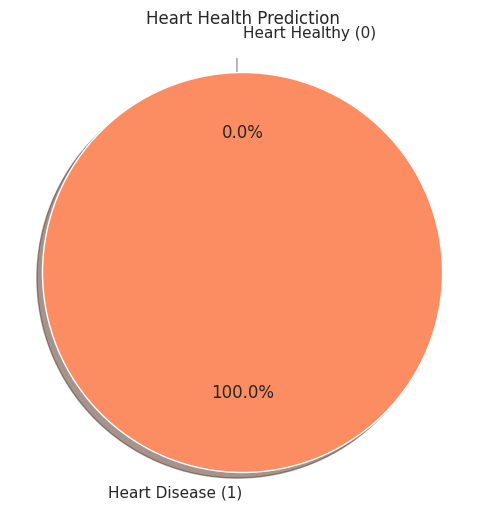

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to get user input
def get_user_input():
    print("Please enter the following values:")

    age = int(input("Age: "))
    
    sex = int(input("Sex (1 = Male, 0 = Female): "))
    
    print("\nChest Pain Type (cp):")
    print("0: Typical angina")
    print("1: Atypical angina")
    print("2: Non-anginal pain")
    print("3: Asymptomatic")
    cp = int(input("Chest Pain Type (0-3): "))
    
    trestbps = int(input("Resting Blood Pressure (in mm Hg): "))
    
    chol = int(input("Serum Cholesterol (in mg/dl): "))
    
    fbs = int(input("Fasting Blood Sugar (1 = True, 0 = False): "))
    
    print("\nResting Electrocardiographic Results (RestECG):")
    print("0: Normal")
    print("1: Having ST-T wave abnormality")
    print("2: Showing possible left ventricular hypertrophy (LVH) by Estes’ criteria")
    restecg = int(input("RestECG (0-2): "))
    
    thalach = int(input("Maximum Heart Rate Achieved: "))
    
    exang = int(input("Exercise Induced Angina (1 = Yes, 0 = No): "))
    
    oldpeak = float(input("Oldpeak (depression induced by exercise relative to rest): "))
    
    print("\nSlope of the Peak Exercise ST Segment (slope):")
    print("0: Upsloping")
    print("1: Flat")
    print("2: Downsloping")
    slope = int(input("Slope of the Peak Exercise ST Segment (0-2): "))
    
    ca = int(input("Number of Major Vessels (0-3): "))
    
    print("\nThalassemia (thal):")
    print("1: Normal (no thalassemia)")
    print("2: Fixed defect (no blood flow to the area of the heart)")
    print("3: Reversible defect (reduced blood flow during stress but normal at rest)")
    thal = int(input("Thalassemia (1-3): "))
    
    return (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

# Get user input
input_data = get_user_input()
print("Input data:", input_data)

# Define feature names
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create a DataFrame for the input data
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# Assuming 'model' is your trained machine learning model
# Make a prediction
prediction = model.predict(input_data_df)
prediction_result = int(prediction[0])

# Generate health message based on prediction result
if prediction_result == 0:
    health_message = "Your heart is healthy!"
else:
    health_message = "There is a risk of heart disease."

print("Prediction (0 = No Disease, 1 = Disease):", prediction_result)
print("\n"health_message)

# Create a dictionary for input data for plotting
input_data_dict = dict(zip(feature_names, input_data))

# Bar plot for input data
plt.figure(figsize=(10, 5))
plt.barh(list(input_data_dict.keys()), list(input_data_dict.values()), color='skyblue')
plt.title('Input Data for Prediction')
plt.xlabel('Value')
plt.ylabel('Features')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

# Create a pie chart for prediction results
plt.figure(figsize=(6, 6))
labels = ['Heart Healthy (0)', 'Heart Disease (1)']
sizes = [1 if prediction_result == 0 else 0, 1 if prediction_result == 1 else 0]
colors = ['#66c2a5', '#fc8d62']
explode = (0.1, 0)  # explode the first slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Heart Health Prediction')
plt.show()
